# Задачи классификации

Задачи кластеризации и классификации часто путают. 

Разберемся, в чем разница.

- **Кластеризация** — задача разбиения множества объектов на группы, называемые кластерами, при этом количество групп неизвестно.
- **Классификация** — задача, в которой имеется множество объектов (ситуаций), разделенных некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся. 

Главное отличие кластеризации от классификации состоит в том, что перечень групп четко не задан и определяется в процессе работы алгоритма.

## Кейс "Кредитный скоринг"

### Описание данных

Рассмотрим задачу кредитного скоринга, рассматривая ее как задачу классификации.

У нас имеются исторические данные о выдаче кредита, в которых есть следующие столбцы:
* кредит - вернул ли клиент кредит (да/нет), 
* проф - класс профессии (упорядоченный с точки зрения платежеспособности),
* тип\_выд\_зп - способ выдачи зарплаты (ежемесячно или еженедельно),
* взр\_сег - возраст разбитый по сегментам,
* кр\_карта - есть или нет кредитная карта.

### Постановка задачи

Необходимо построить классификатор, который для каждого нового клиента будет давать рекомендацию по выдаче ему кредита (выдавать или не выдавать).

### Загрузка данных и их обработка

Перед загрузкой данных импортируем нужные библиотеки:

In [1]:
import pandas as pd # Для работы с табличными данными

import matplotlib # Для отрисовки графиков
import matplotlib.pyplot as plt # Для отрисовки графиков

# выбор темы картинок (необязательная строчка)
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

Загрузим данные в переменную df:

In [2]:
df = pd.read_csv('credit.csv', sep = ';', encoding = 'cp1251')
df.head(10)#выводит первые несколько строчек

,кредит,проф,тип_выд_зп,взр_сег,кр_карта
0,1,2,2,2,1
1,0,2,1,2,0
2,0,4,1,1,1
3,1,2,2,2,0
4,1,3,2,1,0
5,1,1,2,1,1
6,1,2,2,3,0
7,0,2,2,1,0
8,0,2,1,1,0
9,0,3,1,1,0


In [3]:
df.tail()#выводит конец таблицы

,кредит,проф,тип_выд_зп,взр_сег,кр_карта
318,1,2,2,3,0
319,1,2,1,1,0
320,1,2,2,2,0
321,1,2,2,3,0
322,1,2,2,1,0


In [4]:
df.shape#показывает количество столбцов и строк

(323, 5)

In [5]:
df.info()# нет пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   кредит      323 non-null    int64
 1   проф        323 non-null    int64
 2   тип_выд_зп  323 non-null    int64
 3   взр_сег     323 non-null    int64
 4   кр_карта    323 non-null    int64
dtypes: int64(5)
memory usage: 12.7 KB


В строчке выше использовали метод .read_csv(), который позволяет считывать данные в формат DataFrame.
Атрибуты, которые мы использовали:
    
* sep = ';' - указали какой разделитель в файле;
* encoding = 'cp1251' - для корректного отображения кириллицы.

### Построение модели

Отделим в имеющихся данных правильный ответ (вернул ли клиент кредит) от факторов, которые влияют на наше решение (класс профессии, з/п, возраст, наличие кредитной карты):

In [6]:
# Правильный ответ записываем в вектор y (вернул ли клиент кредит)
y = df['кредит']
# Удаляем колонку с правильным ответом - оставшиеся колонки - это факторы
X = df.drop('кредит', axis = 1)#удаляем первый столбец

In [7]:
X.head() #пропал столбец кредита

,проф,тип_выд_зп,взр_сег,кр_карта
0,2,2,2,1
1,2,1,2,0
2,4,1,1,1
3,2,2,2,0
4,3,2,1,0


In [8]:
y.head()#правильный ответ

0    1
1    0
2    0
3    1
4    1
Name: кредит, dtype: int64

Чтобы избежать переобучения и чтобы была возможность оценки точности построенной модели, разделим наши данные на тренировочную (обучающую) и тестовую выборку:

In [9]:
from sklearn.model_selection import train_test_split #разделение на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)#множественное присваивание
# random_state = 42 - для воспроизводимости результатов на разных компьютерах (деление происходит случайным образом)
# test_size = 0.2 - объем тестовой выборки

In [10]:
y_test.head()#рандомные наблюдения

173    1
132    0
197    1
9      0
104    0
Name: кредит, dtype: int64

In [11]:
X_test.head()

,проф,тип_выд_зп,взр_сег,кр_карта
173,1,2,3,0
132,2,2,1,1
197,2,2,2,1
9,3,1,1,0
104,4,1,1,1


In [12]:
y_train.tail()

188    1
71     0
106    0
270    1
102    0
Name: кредит, dtype: int64

In [13]:
X_train.tail()

,проф,тип_выд_зп,взр_сег,кр_карта
188,1,2,2,1
71,2,1,1,0
106,5,1,1,0
270,2,2,2,1
102,3,1,1,1


#### Дерево решений

In [14]:
from sklearn.tree import DecisionTreeClassifier # Импортируем метод

# Инициализируем модель
model = DecisionTreeClassifier(random_state = 42, criterion = 'gini', max_depth = 3, min_samples_leaf = 5)

# random_state = 42, для воспроизводимости результатов 
# criterion = 'gini', критерий разбиения ('gini' или 'entropy')
# max_depth = 3, максимальная глубина дерева
# min_samples_leaf = 5, минимальное число элементов в листе (может быть долей)

# Обучаем модель
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

Для интерпретации получившейся модели удобно изобразить её в виде дерева решающих правил. Для этого в ```sklearn.tree``` предусмотрена функция ```export_graphviz```. Однако неудобство её в том, что она выдаёт результат в виде файла векторной графики ```.dot```, который нужно дополнительно преобразовать в привычный формат (например, в ```.png```).

In [15]:
from sklearn import tree
from sklearn.tree import export_graphviz
from graphviz import Source

In [16]:
pip insatll graphviz-0.10.1-py2.py3-none-any.whl.

ERROR: unknown command "insatll" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.


In [17]:
graph = Source(tree.export_graphviz(model, proportion = True, filled = True, impurity = True, node_ids = True, precision = 1, feature_names = X.columns))
graph

# proportion = True - Показывать доли каждого класса в узлах (а не количество)
# filled = True - раскрашивать узлы в цвет преобладающего класса
# impurity = True - показывать значение impurity для каждого узла (gini)
# node_ids = True - показывать номера узлов
# precision = 1 - Число точек после запятой для отображаемых дробей
# feature_names = X.columns - задать названия факторов
# rotate = True - Повернуть дерево на 90 градусов (вертикальная ориентация)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [18]:

#png_bytes = graph.pipe(format='png')
#with open('tree.png','wb') as f:
 #    f.write(png_bytes)

Модель позволяет оценить ценность каждого фактора в смысле её эффективности для разбиения (Gini importance):

In [19]:
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
2,взр_сег,0.776609
1,тип_выд_зп,0.188646
0,проф,0.026710
3,кр_карта,0.008035


<AxesSubplot:>

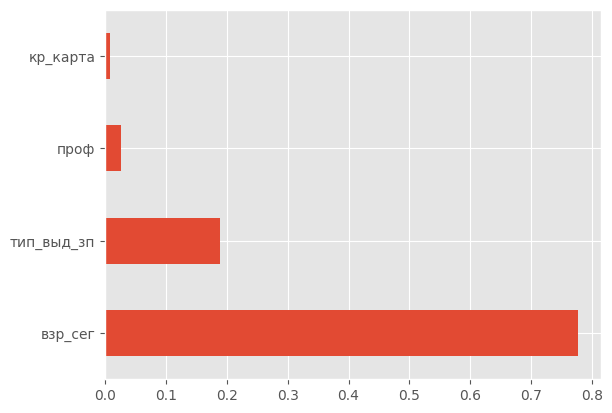

In [20]:
# Отображение ценности в графическом виде
pd.Series(model.feature_importances_, index = X.columns).nlargest(4).plot(kind='barh')

In [21]:
X_test.head()

,проф,тип_выд_зп,взр_сег,кр_карта
173,1,2,3,0
132,2,2,1,1
197,2,2,2,1
9,3,1,1,0
104,4,1,1,1


У данной модели также реализован метод predict, который позволяет получить предсказания классов для входного списка элементов, представленных в пространстве тех же самых признаков (то есть подаём на вход матрицу).

In [22]:
# Строим предсказание модели на тестовом множестве
y_pred = model.predict(X_test)

In [23]:
df = pd.DataFrame({'Реальные значения': y_test, 'Предсказанные значения': y_pred})
df.head(10)

,Реальные значения,Предсказанные значения
173,1,1
132,0,0
197,1,1
9,0,0
104,0,0
119,0,0
256,1,1
158,1,1
226,1,1
312,1,0


Не забываем про оценку качества:

In [24]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index = model.classes_, columns = model.classes_)
conf_mat

,0,1
0,27,3
1,10,25


То, что говорит модель - колонки, то, что на самом деле - индексы.
То есть:

 0 | 1
---|---
TN | FP
FN | TP

$ Precision = {{TP} \over{TP+FP}} $ - точность 

$ Recall = {{TP} \over{TP+FN}} $ - полнота

In [25]:
precision = conf_mat.iloc[1,1]/(conf_mat[1].sum())
recall = conf_mat.iloc[1,1]/(conf_mat.iloc[1].sum())
print('Точность = {}'.format(round(precision, 2)))
print('Полнота = {}'.format(round(recall, 2)))

Точность = 0.89
Полнота = 0.71


In [26]:
# Предсказание класса для новых элементов
new_item = [2, 2, 4, 1]
model.predict([new_item])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

#### Случайный лес

**Деревья решений** - хороший инструмент, поскольку позволяет очень просто интерпретировать полученные результаты. Однако не всегда полученная точность модели удовлетворяет исследователя.

В таком случае,задачу можно решить более эффективным (с точки зрения показателей точности) методом - случайным лесом.

**Случайный лес** - это ансамбль решающих деревьев.

Настроим модель случайных лесов для наших данных.

Документация здесь: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [27]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 42, n_estimators = 100, criterion ='gini', max_depth = 3)

# n_estimators = 30, число деревьев в лесу
# oob_score = True, вычислять out-of-bag ошибку

In [28]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [29]:
y_pred_rf = model_rf.predict(X_test)

In [30]:
y_pred_rf

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [31]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred_rf)
conf_mat = pd.DataFrame(conf_mat, index = model.classes_, columns=model.classes_)
conf_mat

,0,1
0,27,3
1,8,27


In [32]:
precision = conf_mat.iloc[1,1]/(conf_mat[1].sum())
recall = conf_mat.iloc[1,1]/(conf_mat.iloc[1].sum())
print('Точность = {}'.format(round(precision, 2)))
print('Полнота = {}'.format(round(recall, 2)))

Точность = 0.9
Полнота = 0.77


Точность выше, чем у одного дерева.

In [33]:
pd.DataFrame({'feature': X.columns,
              'importance': model_rf.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
1,тип_выд_зп,0.444024
2,взр_сег,0.421540
0,проф,0.127157
3,кр_карта,0.007279


<AxesSubplot:>

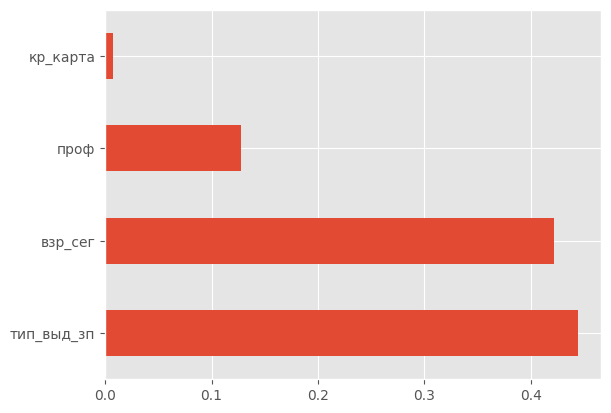

In [34]:
pd.Series(model_rf.feature_importances_, index = X.columns).nlargest(6).plot(kind = 'barh')